### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

/Users/adityasingh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Character encodings

We humans read text as it is presented by computers see them as binary numbers. There is a need to represent the text in readable form. Thats where encoding comes in. They are a way to represent text into binary (generally in different bits count, etc). Most famous encodings are:

1. ASCII
2. Unicode (UTF-8, 16, 32, UTF is Unicode Transformation Format)

Some other famous encodings are:

1. Latin-US
2. Japanese
3. Chinese
4. ISO-8859

The data we have cant be read using the `utf-8` encoding. After a deep google search we used `latin-1` encoding and it works perfectly fine.

We could have also used `chardet` library which detects encoding of each character and returns the encoding type which we can then use to process the text.

In [2]:
cols = ['sentiment','id','date','flag','user','text']
data = pd.read_csv("../data/training.1600000.processed.noemoticon.csv", header=None, names=cols, encoding='latin-1')

In the dataset, the target is represented as 0 for negative sentiment and 4 as positive sentiment. This we will change later, where 0 will be negative sentiment and 1 will be positive sentiment.

In [3]:
data

,sentiment,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


There is equal number of data points for both the sentiment values (0 and 4). This shows that data is equally balanced and not skewed in any direction.

In [4]:
data.sentiment.value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

Dropping the unwanted columns.

In [5]:
data.drop(['id','date','flag'], axis=1, inplace=True)

In [6]:
data

,sentiment,user,text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,scotthamilton,is upset that he can't update his Facebook by ...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,4,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
data[data.sentiment==0].head()

,sentiment,user,text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,scotthamilton,is upset that he can't update his Facebook by ...
2,0,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
data[data.sentiment==4].head()

,sentiment,user,text
800000,4,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,becca210,im meeting up with one of my besties tonight! ...
800002,4,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,katarinka,Being sick can be really cheap when it hurts t...
800004,4,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


The above two cells show that the sentiment 0 and sentiment 4 are equally distributed and there is a clear segregation between them at 800000.

In [9]:
data['pre_clean_len'] = [len(x) for x in data.text]

### Boxplot of the length of tweets

We can see from the boxplot that there exists some outliers. The mean is around 60 characters. When this data was collected the maximum allowed length of tweet was 140 characters.

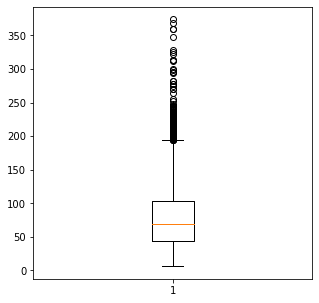

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(data.pre_clean_len)
plt.show()

On further deep dive we find that the length of tweets increase because of the few encoded text strings. This needs to be updated.

In [11]:
data[data.pre_clean_len > 140].tail()

,sentiment,user,text,pre_clean_len
1599460,4,comradephil,@aw16 I must have skipped the &quot;pun&quot; ...,157
1599557,4,johnbertr,@chinkchilla there's this brilliant add-on for...,146
1599835,4,annamadeleine,@alexandervelky that's polite version - i only...,145
1599921,4,followtweety,I just switched back to Opera (using the moi s...,142
1599965,4,milliontwits,@stum450n Hi. Thanks for the follow. Nice webs...,141


### Text preprocessing

We perform preprocessing of the tweets with the following operations:

1. Identify any mentions in the tweets and remove them as they might not be contributing anything to the sentiment value of the text.
2. Identify any URLs that might be present in the text. Again the same reason as above.
3. Identify any URLs in the form `"www."` and remove them.
4. Convert any negation shorthand text to their full form like `isn't` to `is not`.
5. Handle any XML or HTML text using the `lxml` libraries.
6. Replace any decoded string of form `\ufffd` to `?`.
7. Convert the text to the lowercase although it should be noted that upper case can be used to convery a strong emotion. Although we are not taking that into consideration.

In [14]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [15]:
nums = [0,400000,800000,1200000,1600000]
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for j in range(1,5):
    for i in range(nums[j-1],nums[j]):
        if( (i+1)%10000 == 0 ):
            print(f"Tweets {i+1} of {nums[j]} has been processed")                                                                    
        clean_tweet_texts.append(tweet_cleaner(data['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 400000 has been processed
Tweets 20000 of 400000 has been processed
Tweets 30000 of 400000 has been processed
Tweets 40000 of 400000 has been processed
Tweets 50000 of 400000 has been processed
Tweets 60000 of 400000 has been processed
Tweets 70000 of 400000 has been processed
Tweets 80000 of 400000 has been processed
Tweets 90000 of 400000 has been processed
Tweets 100000 of 400000 has been processed
Tweets 110000 of 400000 has been processed
Tweets 120000 of 400000 has been processed
Tweets 130000 of 400000 has been processed
Tweets 140000 of 400000 has been processed
Tweets 150000 of 400000 has been processed
Tweets 160000 of 400000 has been processed
Tweets 170000 of 400000 has been processed
Tweets 180000 of 400000 has been processed
Tweets 190000 of 400000 has been processed
Tweets 200000 of 400000 has been processed
Tweets 210000 of 400000 has been processed
Tweets 220000 of 400000 has been processed
Tweets 230000 of 400000 has

### Saving the cleaned text

After all the preprocessing, save the clean data so that it can be used later.

In [16]:
clean_data = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_data['target'] = data.sentiment
clean_data.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [17]:
clean_data.to_csv('../data/clean_tweet.csv',encoding='utf-8')
csv = '../data/clean_tweet.csv'
my_data = pd.read_csv(csv,index_col=0)
my_data.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [20]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1596041 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


Remove any null cells in the dataset.

In [23]:
np.sum(my_data.isnull().any(axis=1))

3959

In [24]:
data.iloc[my_data[my_data.isnull().any(axis=1)].index, :].head()

,sentiment,user,text,pre_clean_len
208,0,Artiel87,@mandayyy,10
249,0,Artiel87,@mandayyy,12
282,0,__Susan__,@ITS_NEMESIS -------,21
398,0,KimberlyKane,@danadearmond,14
430,0,jtmal0723,@anistorm,10


In [25]:
my_data.dropna(inplace=True)
my_data.reset_index(drop=True, inplace=True)
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1596041 non-null  object
 1   target  1596041 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [27]:
def changeTarget(x):
    if x == 4:
        return 1
    return 0

my_data.target = my_data.target.apply(changeTarget)

In [28]:
my_data.to_csv('../data/clean_tweet.csv',encoding='utf-8')
csv = '../data/clean_tweet.csv'
my_data = pd.read_csv(csv,index_col=0)
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1596041 non-null  object
 1   target  1596041 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 36.5+ MB
